## Loading Data

In [1]:
import pandas as pd

In [2]:
original_data=pd.read_csv("E:/ml project/songs/data.csv")
data_songs=pd.read_csv("E:/ml project/songs/data.csv")
data_artists=pd.read_csv("E:/ml project/songs/data_by_artist.csv")
data_genre=pd.read_csv("E:/ml project/songs/data_by_genres.csv")
data_year=pd.read_csv("E:/ml project/songs/data_by_year.csv")

## Exploratory Data Analysis

In [3]:
data_songs.shape

(174389, 19)

In [4]:
data_songs.head(2)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.634,1920
1,0.643,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.950,1920


In [5]:
data=data_songs.drop(['id','name','artists'],axis=1)

In [6]:
null_columns=data.columns[data.isnull().any()]
df=data[null_columns].isnull().sum()
df

Series([], dtype: float64)

In [7]:
data=data.drop(["release_date"],axis=1) 

## Scaling Data

In [8]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
predictor = mm.fit_transform(data)

## Checking suitable number of cluster

In [9]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,40):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,
                 random_state=0)
    kmeans.fit(predictor)
    wcss.append(kmeans.inertia_)

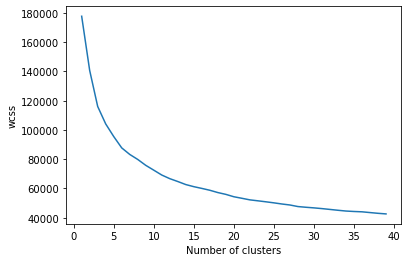

In [10]:
import matplotlib.pyplot as plt
plt.plot(range(1,40),wcss)
plt.ylabel("wcss")
plt.xlabel("Number of clusters")
plt.show()

In [11]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics.cluster import davies_bouldin_score
from sklearn.metrics import silhouette_score
dbs_1=[]
sc_1=[]
for k in range(2, 15):
    kmeans_model = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0).fit(predictor)
    labels = kmeans_model.labels_
    dbs_1.append(davies_bouldin_score(predictor, labels))
    sc_1.append(silhouette_score(predictor, labels))

print(" ")
for i in range(0,len(dbs_1)):
    a=i+2
    print("davies_bouldin_score for "+str(a)+" clusters: "+str(dbs_1[i]))

print("\n")

for i in range(0,len(dbs_1)):
    a=i+2
    print("silhouette_score for "+str(a)+" clusters: "+str(sc_1[i]))

 
davies_bouldin_score for 2 clusters: 1.7389519998419904
davies_bouldin_score for 3 clusters: 1.5850430052392699
davies_bouldin_score for 4 clusters: 1.6062210480383157
davies_bouldin_score for 5 clusters: 1.608741689206441
davies_bouldin_score for 6 clusters: 1.5129031777326738
davies_bouldin_score for 7 clusters: 1.6425972285811632
davies_bouldin_score for 8 clusters: 1.5659889562314544
davies_bouldin_score for 9 clusters: 1.6418209292186838
davies_bouldin_score for 10 clusters: 1.5721589346894016
davies_bouldin_score for 11 clusters: 1.5740943397934475
davies_bouldin_score for 12 clusters: 1.5719846135087785
davies_bouldin_score for 13 clusters: 1.535907116122945
davies_bouldin_score for 14 clusters: 1.527831542781083


silhouette_score for 2 clusters: 0.24682785395451257
silhouette_score for 3 clusters: 0.2114381646920524
silhouette_score for 4 clusters: 0.2277212909512017
silhouette_score for 5 clusters: 0.21278317272368166
silhouette_score for 6 clusters: 0.22232386446242033
sil

In [12]:
pd.options.display.max_colwidth = 100
report=[]
tmp = pd.Series({'Model': " Clustering using kmeans with original data ",\
                 'Cluster number': sc_1.index(max(sc_1))+2,
                 'silhouette_score': max(sc_1),
                 'Davies bouldin score': dbs_1[sc_1.index(max(sc_1))]})
tmp_df = pd.DataFrame(tmp)
report = tmp_df.T
report

,Model,Cluster number,silhouette_score,Davies bouldin score
0,Clustering using kmeans with original data,2,0.246828,1.73895


### checking scores after reducing demensions

In [13]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.express as px 
pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=3))])
predictor_3 = pca_pipeline.fit_transform(predictor)

In [14]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,40):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,
                 random_state=0)
    kmeans.fit(predictor_3)
    wcss.append(kmeans.inertia_)

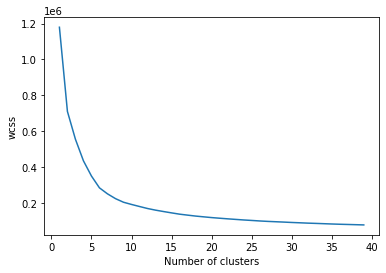

In [15]:
import matplotlib.pyplot as plt
plt.plot(range(1,40),wcss)
plt.ylabel("wcss")
plt.xlabel("Number of clusters")
plt.show()

In [16]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics.cluster import davies_bouldin_score
from sklearn.metrics import silhouette_score
dbs_2=[]
sc_2=[]
for k in range(2, 15):
    kmeans_model = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0).fit(predictor_3)
    labels_3 = kmeans_model.labels_
    dbs_2.append(davies_bouldin_score(predictor_3, labels_3))
    sc_2.append(silhouette_score(predictor_3, labels_3))

print(" ")
for i in range(0,len(dbs_2)):
    a=i+2
    print("davies_bouldin_score for "+str(a)+" clusters: "+str(dbs_2[i]))

print("\n")

for i in range(0,len(dbs_2)):
    a=i+2
    print("silhouette_score for "+str(a)+" clusters: "+str(sc_2[i]))
    
print("\n")

 
davies_bouldin_score for 2 clusters: 1.0695745593797017
davies_bouldin_score for 3 clusters: 0.8784616040569316
davies_bouldin_score for 4 clusters: 0.9093588808737986
davies_bouldin_score for 5 clusters: 0.8627078851095821
davies_bouldin_score for 6 clusters: 0.901233400072357
davies_bouldin_score for 7 clusters: 0.8964231981476691
davies_bouldin_score for 8 clusters: 0.8951372227825404
davies_bouldin_score for 9 clusters: 0.930523909216433
davies_bouldin_score for 10 clusters: 0.9642392945844305
davies_bouldin_score for 11 clusters: 0.949440835558235
davies_bouldin_score for 12 clusters: 0.9344656931337173
davies_bouldin_score for 13 clusters: 0.9477281917576991
davies_bouldin_score for 14 clusters: 0.9585676917681455


silhouette_score for 2 clusters: 0.38407384538435196
silhouette_score for 3 clusters: 0.4070433291939967
silhouette_score for 4 clusters: 0.34013285371096225
silhouette_score for 5 clusters: 0.3682723608370844
silhouette_score for 6 clusters: 0.34774918789424303
sil

In [17]:
pd.options.display.max_colwidth = 100
tmp = pd.Series({'Model': " Clustering using kmeans after PCA ",\
                 'Cluster number': sc_2.index(max(sc_2))+2,
                 'silhouette_score': max(sc_2),
                'Davies bouldin score': dbs_2[sc_2.index(max(sc_2))]})
tmp_df = pd.DataFrame(tmp)
report = report.append(tmp_df.T)
report

,Model,Cluster number,silhouette_score,Davies bouldin score
0,Clustering using kmeans with original data,2,0.246828,1.73895
0,Clustering using kmeans after PCA,3,0.407043,0.878462


### Clustering data using DBSCAN

In [18]:
from sklearn.cluster import DBSCAN
import numpy as np

In [19]:
db = DBSCAN(eps=0.3, min_samples=10).fit(predictor)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [20]:
pd.options.display.max_colwidth = 100
tmp = pd.Series({'Model': " Clustering using  DBSCAN",
                 'Cluster number':  n_clusters_,
                 'silhouette_score': metrics.silhouette_score(predictor_3, labels),
                'Davies bouldin score': davies_bouldin_score(predictor_3, labels)})
tmp_df = pd.DataFrame(tmp)
report = report.append(tmp_df.T)
report 

,Model,Cluster number,silhouette_score,Davies bouldin score
0,Clustering using kmeans with original data,2,0.246828,1.73895
0,Clustering using kmeans after PCA,3,0.407043,0.878462
0,Clustering using DBSCAN,35,-0.501129,2.88744


In [21]:
db = DBSCAN(eps=0.3, min_samples=10).fit(predictor_3)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [22]:
pd.options.display.max_colwidth = 100
tmp = pd.Series({'Model': " Clustering using DBSCAN after PCA ",
                 'Cluster number':  n_clusters_,
                 'silhouette_score': metrics.silhouette_score(predictor_3, labels),
                'Davies bouldin score': davies_bouldin_score(predictor_3, labels)})
tmp_df = pd.DataFrame(tmp)
report = report.append(tmp_df.T)
report 

,Model,Cluster number,silhouette_score,Davies bouldin score
0,Clustering using kmeans with original data,2,0.246828,1.73895
0,Clustering using kmeans after PCA,3,0.407043,0.878462
0,Clustering using DBSCAN,35,-0.501129,2.88744
0,Clustering using DBSCAN after PCA,14,-0.102797,1.59157


### silhouette_score is high for 3 clusters. So, taking 3 for further analysis

In [23]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
predictor = mm.fit_transform(data)

In [24]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=3))])
predictor_3 = pca_pipeline.fit_transform(predictor)
kmeans_model = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0).fit(predictor_3)
labels = kmeans_model.labels_
DF = pd.DataFrame(columns=['x', 'y','z'], data=predictor_3)
DF['cluster'] = labels

In [25]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
DF_scaled = mm.fit_transform(DF)

In [26]:
data_scaled=pd.DataFrame(DF_scaled)

## Recommendation System

In [27]:
### Adding name of song, artist and year in the dataframe for recommendation system

In [28]:
col=['name','artists','year']
song_singer=data_songs[col]
song_singer["artist"] = 1 ### adding 1 for checking whether artist is same or not

<ipython-input-28-7438847baa3f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  song_singer["artist"] = 1 ### adding 1 for checking whether artist is same or not


In [29]:
data_recommmend=pd.concat([data_scaled, song_singer], axis=1)

In [30]:
data_recommmend.shape

(174389, 8)

In [31]:
#### Recommendation system without considering artist name

In [32]:
from tqdm import tqdm
class Recommender_system():
    """
    Neighbourhood Based Collborative Filterng REcoomendation System using similarity Metrics
    Manhattan Distance is calculated for all songs and Recommend Songs that are similar to it based on any given song
    """
    def __init__(self, data):
        self.data_ = data_recommmend
    
    #function which returns recommendations, we can also choose the amount of songs to be recommended
    def recommendations(self, song_name, song_artist, n_top):
        distances = []
        #choosing the given song_name and dropping it from the data
        song = self.data_[(self.data_.name.str.lower() == song_name.lower())].head(1).values[0]
        rem_data = self.data_[self.data_.name.str.lower() != song_name.lower()]
        song_return=same_artist_recommendations(self, song_name, song_artist, n_top)
        for r_song in tqdm(rem_data.values):
            dist = 0
            for col in np.arange(len(rem_data.columns)):
                #indeces of non-numerical columns(id,Release date,name,artists)
                if col in [0,3]:
                #calculating the manhettan distances for each numerical feature
                    dist = dist + np.absolute(float(song[col]) - float(r_song[col]))
            distances.append(dist)
        rem_data['distance'] = distances
        #sorting our data to be ascending by 'distance' feature
        rem_data = rem_data.sort_values('distance')
        columns = ['artists', 'name','year']
        return rem_data[columns][:n_top]

#### Recommendation system considering artist name. If artist name is same then 1 is added in the data else 0 to input data and then distance is checked with int 1

In [33]:
def same_artist_recommendations(self, song_name, song_artist, n_top):
        distances = []
        #choosing the given song_name and dropping it from the data
        song = self.data_[(self.data_.name.str.lower() == song_name.lower())].head(1).values[0]
        rem_data = self.data_[self.data_.name.str.lower() != song_name.lower()]
        ### checking artist
        rem_data.loc[(self.data_.artists.str.lower() == song_artist.lower()),"artist"] =1 
        rem_data.loc[(self.data_.artists.str.lower() != song_artist.lower()),"artist"] =0
        for r_song in tqdm(rem_data.values):
            dist = 0
            for col in np.arange(len(rem_data.columns)):
                #indeces of non-numerical columns(id,Release date,name,artists)
                if col not in [4,5,6]:
                #calculating the manhettan distances for each numerical feature
                    dist = dist + np.absolute(float(song[col]) - float(r_song[col]))
            distances.append(dist)
        rem_data['distance'] = distances
        #sorting our data to be ascending by 'distance' feature
        rem_data = rem_data.sort_values('distance')
        columns = ['artists', 'name','year']
        print("Considering artist")
        print(rem_data[columns][:n_top])

In [34]:
import numpy as np
recommender = Recommender_system(data_recommmend)
recommender.recommendations('Hero','[\'Enrique Iglesias\']', 3)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
100%|██████████| 174380/174380 [00:02<00:00, 81001.62it/s]
<ipython-input-33-34c41e26cef5>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rem_data['distance'] = distances
  7%|▋         | 11882/174380 [00:00<00:01, 118043.63it/s]

Considering artist
                     artists               name  year
35078   ['Enrique Iglesias']  Nunca Te Olvidaré  1998
153829  ['Enrique Iglesias']   Falta Tanto Amor  1995
169091  ['Enrique Iglesias']       Inalcanzable  1995


100%|██████████| 174380/174380 [00:01<00:00, 128060.87it/s]
<ipython-input-32-06cde462b998>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rem_data['distance'] = distances


,artists,name,year
73742,"['Sarah Brightman', 'Andrea Bocelli']",Time To Say Goodbye,2006
52535,['Bobby Caldwell'],Carry On,1991
6001,['La Sonora Santanera'],Por un Puñado de Oro,1950


In [35]:
feature_number= ['acousticness', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence', 'year']
feature_name =pd.DataFrame(feature_number)

### Checking recommendation system considering artist

Correlation Matrix of top 2 recommened songs considering artist name
[[1.         0.79846759]
 [0.79846759 1.        ]]
[[1.         0.89223881]
 [0.89223881 1.        ]]


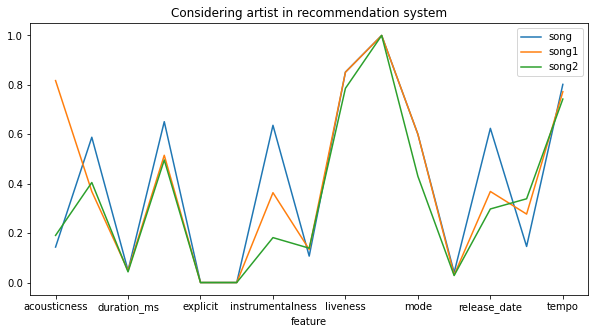

In [36]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
mm = MinMaxScaler()
data_scaled = mm.fit_transform(data)
data_scaled_df =pd.DataFrame(data_scaled)

x=data_scaled_df.loc[(data_songs['name'] == 'Hero') & (data_songs['artists'] == '[\'Enrique Iglesias\']')]
y=data_scaled_df.loc[(data_songs['name'] == 'Nunca Te Olvidaré') & (data_songs['artists'] == '[\'Enrique Iglesias\']')]
z=data_scaled_df.loc[(data_songs['name'] == 'Falta Tanto Amor') & (data_songs['artists'] == '[\'Enrique Iglesias\']')]
comparison=pd.concat([feature_name,x.transpose(),y.transpose(),z.transpose()],axis=1)
comparison.columns = ['feature','song','song1','song2']
print('\033[1m' +"Correlation Matrix of top 2 recommened songs considering artist name"  + '\033[0m')
print(np.corrcoef(x, y))
print(np.corrcoef(x, z))
comparison.plot(x="feature", y=["song", "song1", "song2"], figsize=(10, 5))
plt.title("Considering artist in recommendation system")
plt.show()

Correlation Matrix of top 2 recommened songs not considering artist name
[[1.         0.76195103]
 [0.76195103 1.        ]]
[[1.         0.69097605]
 [0.69097605 1.        ]]


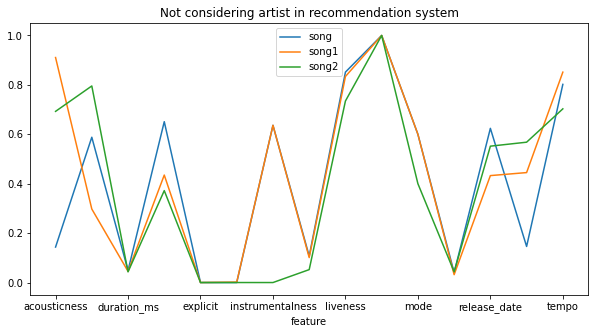

In [38]:
x=data_scaled_df.loc[(data_songs['name'] == 'Hero') & (data_songs['artists'] == '[\'Enrique Iglesias\']')]
y=data_scaled_df.loc[(data_songs['name'] == 'Time To Say Goodbye') & (data_songs['year']==2006) & (data_songs['artists'] == '[\'Sarah Brightman\', \'Andrea Bocelli\']')]
z=data_scaled_df.loc[(data_songs['name'] == 'Carry On') &  (data_songs['year']==1991) & (data_songs['artists'] == '[\'Bobby Caldwell\']')]
comparison=pd.concat([feature_name,x.transpose(),y.transpose(),z.transpose()],axis=1)
comparison.columns = ['feature','song','song1','song2']
print('\033[1m' +"Correlation Matrix of top 2 recommened songs not considering artist name"  + '\033[0m')
print(np.corrcoef(x, y))
print(np.corrcoef(x, z))

comparison.plot(x="feature", y=["song", "song1", "song2"], figsize=(10, 5))
plt.title("Not considering artist in recommendation system")
plt.show()